In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [2]:
data=pd.read_csv('innercity.csv')

In [3]:
data.head(5)

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [ ]:
data.shape

(21613, 23)

In [5]:
# let's check whether our dataset have any null/missing values
data.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

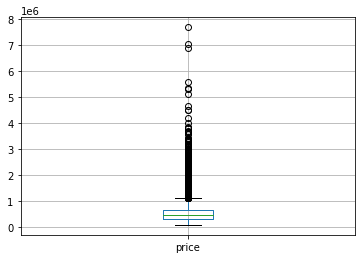

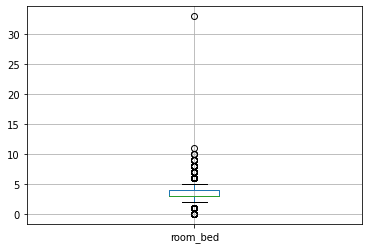

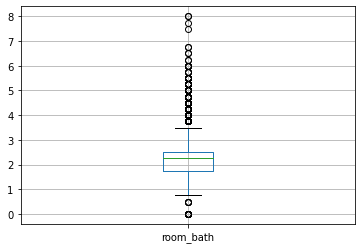

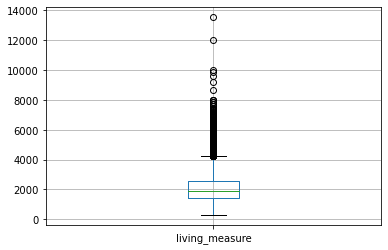

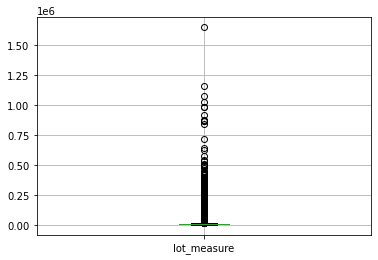

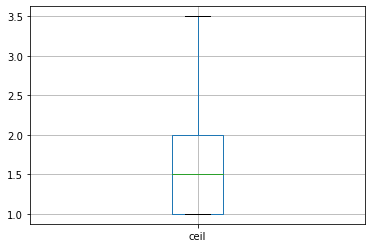

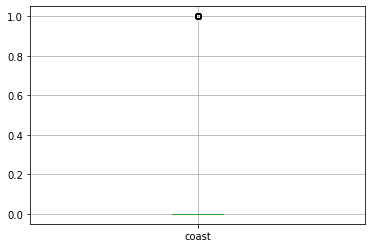

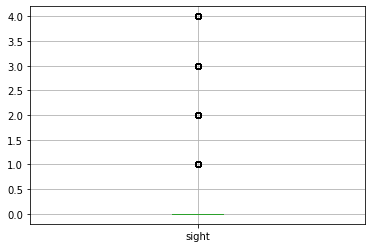

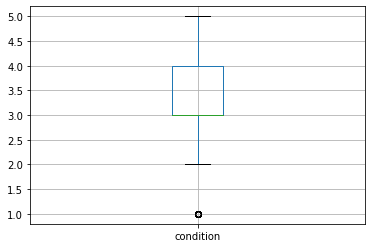

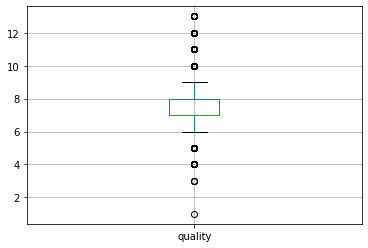

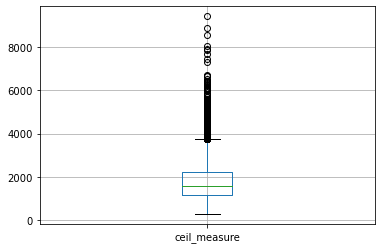

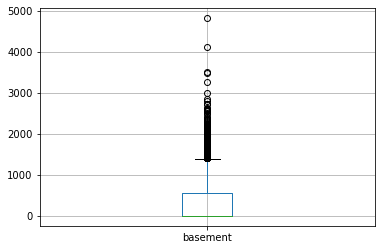

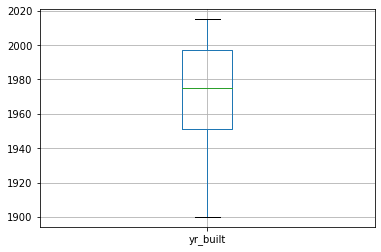

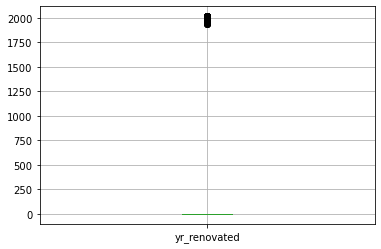

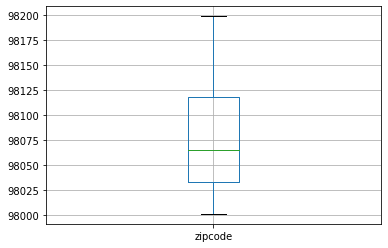

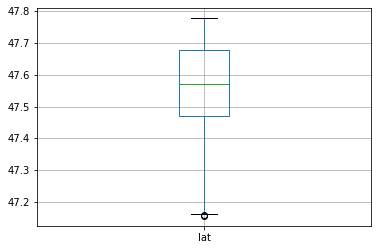

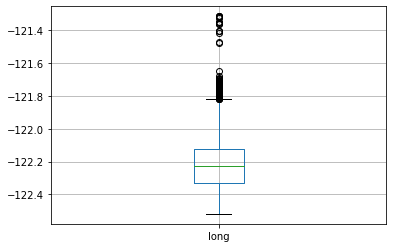

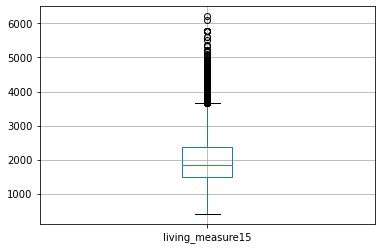

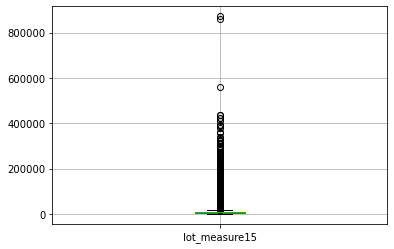

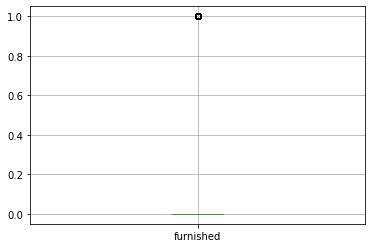

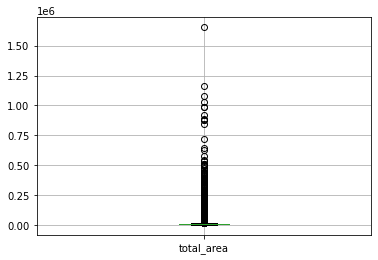

In [6]:
# size of plots to make it uniform throughout our analysis in the notebook
plotSizeX = 12
plotSizeY = 6
# let's boxplot all the numerical columns and see if there any outliers
for i in data.iloc[:, 2:].columns:
    data.iloc[:, 1:].boxplot(column=i)
    plt.show()

In [ ]:
dups= data.pivot_table(index=['cid'], aggfunc = 'size')

In [ ]:
dups.head(5)

cid
1000102    2
1200019    1
1200021    1
2800031    1
3600057    1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
data[data['cid']==795000620]

cid         dayhours   price  ...  lot_measure15  furnished  total_area
1634   795000620  20140924T000000  115000  ...           6250          0        7330
15184  795000620  20141215T000000  124000  ...           6250          0        7330
20544  795000620  20150311T000000  157000  ...           6250          0        7330

[3 rows x 23 columns]

In [ ]:
dups.sort_values(axis=0, ascending =False).head(400)

cid
795000620     3
1000102       2
3935900232    2
6791200120    2
1901600090    2
             ..
2769602840    1
2769602880    1
2770600795    1
2770600853    1
2768300650    1
Length: 400, dtype: int64

In [11]:
#cid - CID is appearing muliple times, it seems data contains house which is sold multiple times
cid_count=data.cid.value_counts()
cid_count[cid_count>1].shape

(176,)

In [7]:
data1= data.drop_duplicates(subset=['cid'])

In [8]:
data1.shape

(21436, 23)

In [9]:
data.drop_duplicates()

cid         dayhours   price  room_bed  room_bath  \
0      3034200666  20141107T000000  808100         4       3.25   
1      8731981640  20141204T000000  277500         4       2.50   
2      5104530220  20150420T000000  404000         3       2.50   
3      6145600285  20140529T000000  300000         2       1.00   
4      8924100111  20150424T000000  699000         2       1.50   
...           ...              ...     ...       ...        ...   
21608  5137800030  20140701T000000  300000         4       2.50   
21609  8562890910  20140619T000000  320000         4       2.50   
21610  1442880160  20140627T000000  483453         4       2.75   
21611   622100130  20140917T000000  365000         2       2.00   
21612  6413600276  20150324T000000  354950         3       1.00   

       living_measure  lot_measure  ceil  coast  sight  ...  basement  \
0                3020        13457   1.0      0      0  ...         0   
1                2550         7500   1.0      0      0  ...       800   
2                2370         4324   2.0      0      0  ...         0   
3                 820         3844   1.0      0      0  ...         0   
4                1400         4050   1.0      0      0  ...         0   
...               ...          ...   ...    ...    ...  ...       ...   
21608            2303         3826   2.0      0      0  ...         0   
21609            3490         5000   2.0      0      0  ...         0   
21610            2790         5527   2.0      0      0  ...         0   
21611            1440        15000   1.0      0      0  ...         0   
21612             970         5922   1.5      0      0  ...         0   

       yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0          1956             0    98133  47.7174 -122.336              2120   
1          1976             0    98023  47.3165 -122.386              2260   
2          2006             0    98038  47.3515 -121.999              2370   
3          1916             0    98133  47.7049 -122.349              1520   
4          1954             0    98115  47.6768 -122.269              1900   
...         ...           ...      ...      ...      ...               ...   
21608      2006             0    98092  47.3258 -122.165              2516   
21609      2003             0    98042  47.3772 -122.127              2910   
21610      2014             0    98045  47.4827 -121.773              2620   
21611      1985             0    98072  47.7648 -122.159              1780   
21612      1949             0    98125  47.7190 -122.321              1730   

       lot_measure15  furnished  total_area  
0               7553          1       16477  
1               8800          0       10050  
2               4348          0        6694  
3               3844          0        4664  
4               5940          0        5450  
...              ...        ...         ...  
21608           4500          0        6129  
21609           5025          0        8490  
21610           5509          0        8317  
21611          15000          0       16440  
21612           6128          0        6892  

[21613 rows x 23 columns]

In [ ]:
data1.head(5)

cid         dayhours   price  ...  lot_measure15  furnished  total_area
0  3034200666  20141107T000000  808100  ...           7553          1       16477
1  8731981640  20141204T000000  277500  ...           8800          0       10050
2  5104530220  20150420T000000  404000  ...           4348          0        6694
3  6145600285  20140529T000000  300000  ...           3844          0        4664
4  8924100111  20150424T000000  699000  ...           5940          0        5450

[5 rows x 23 columns]

In [ ]:
data1['price'].value_counts()

450000    172
350000    167
550000    158
500000    151
425000    150
         ... 
374990      1
354500      1
284850      1
641200      1
884744      1
Name: price, Length: 3608, dtype: int64

In [ ]:
data1['room_bed'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

In [ ]:
data1.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

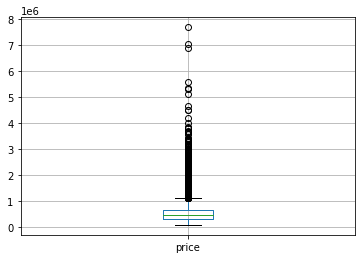

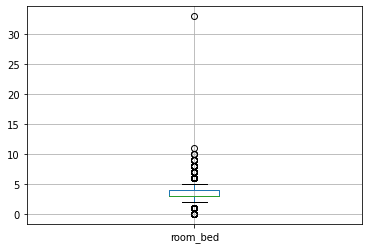

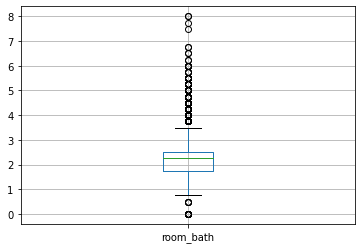

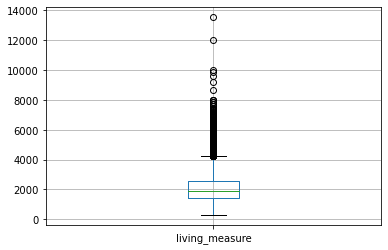

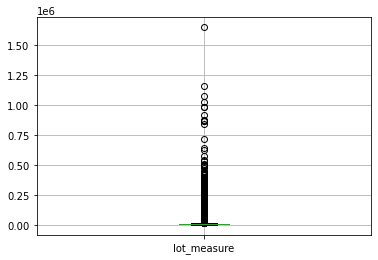

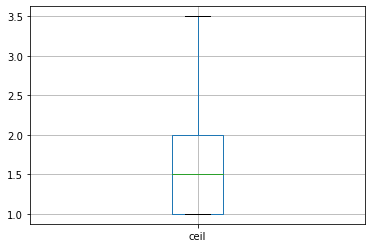

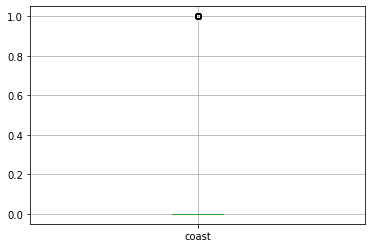

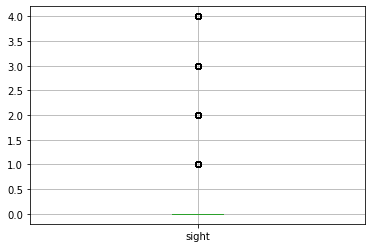

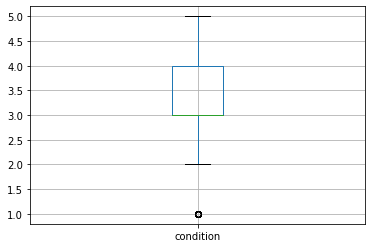

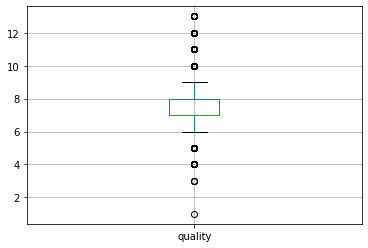

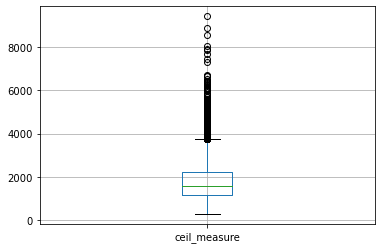

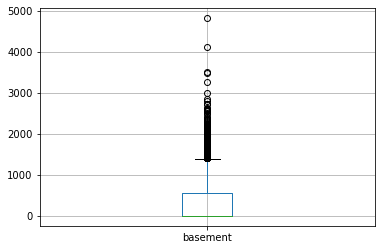

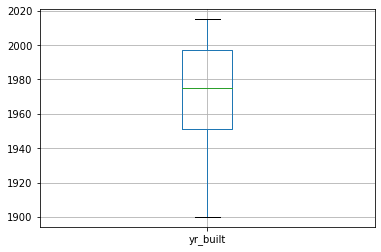

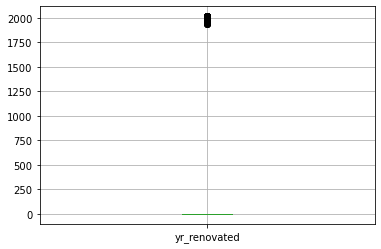

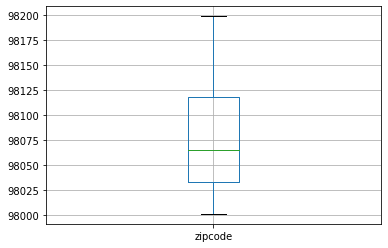

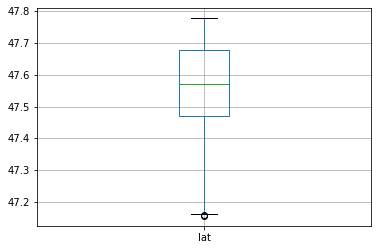

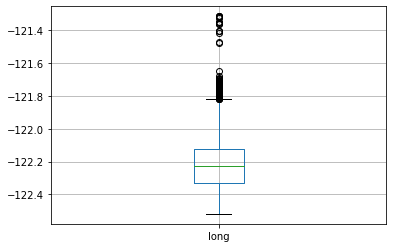

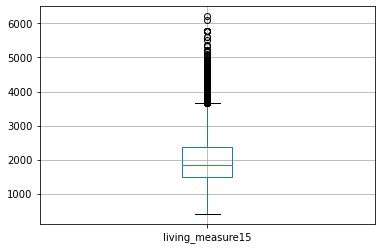

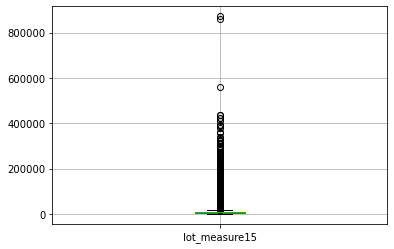

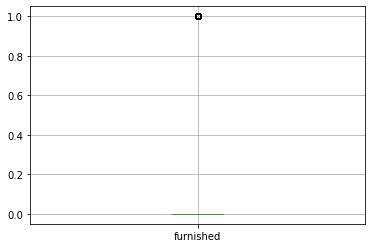

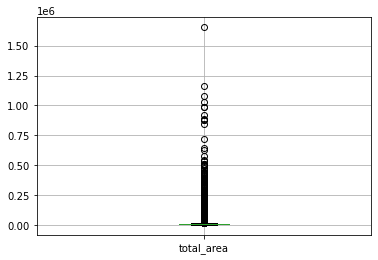

In [10]:
# size of plots to make it uniform throughout our analysis in the notebook
plotSizeX = 12
plotSizeY = 6
# let's boxplot all the numerical columns and see if there any outliers
for i in data.iloc[:, 2:].columns:
    data.iloc[:, 1:].boxplot(column=i)
    plt.show()

In [ ]:
data1.describe()

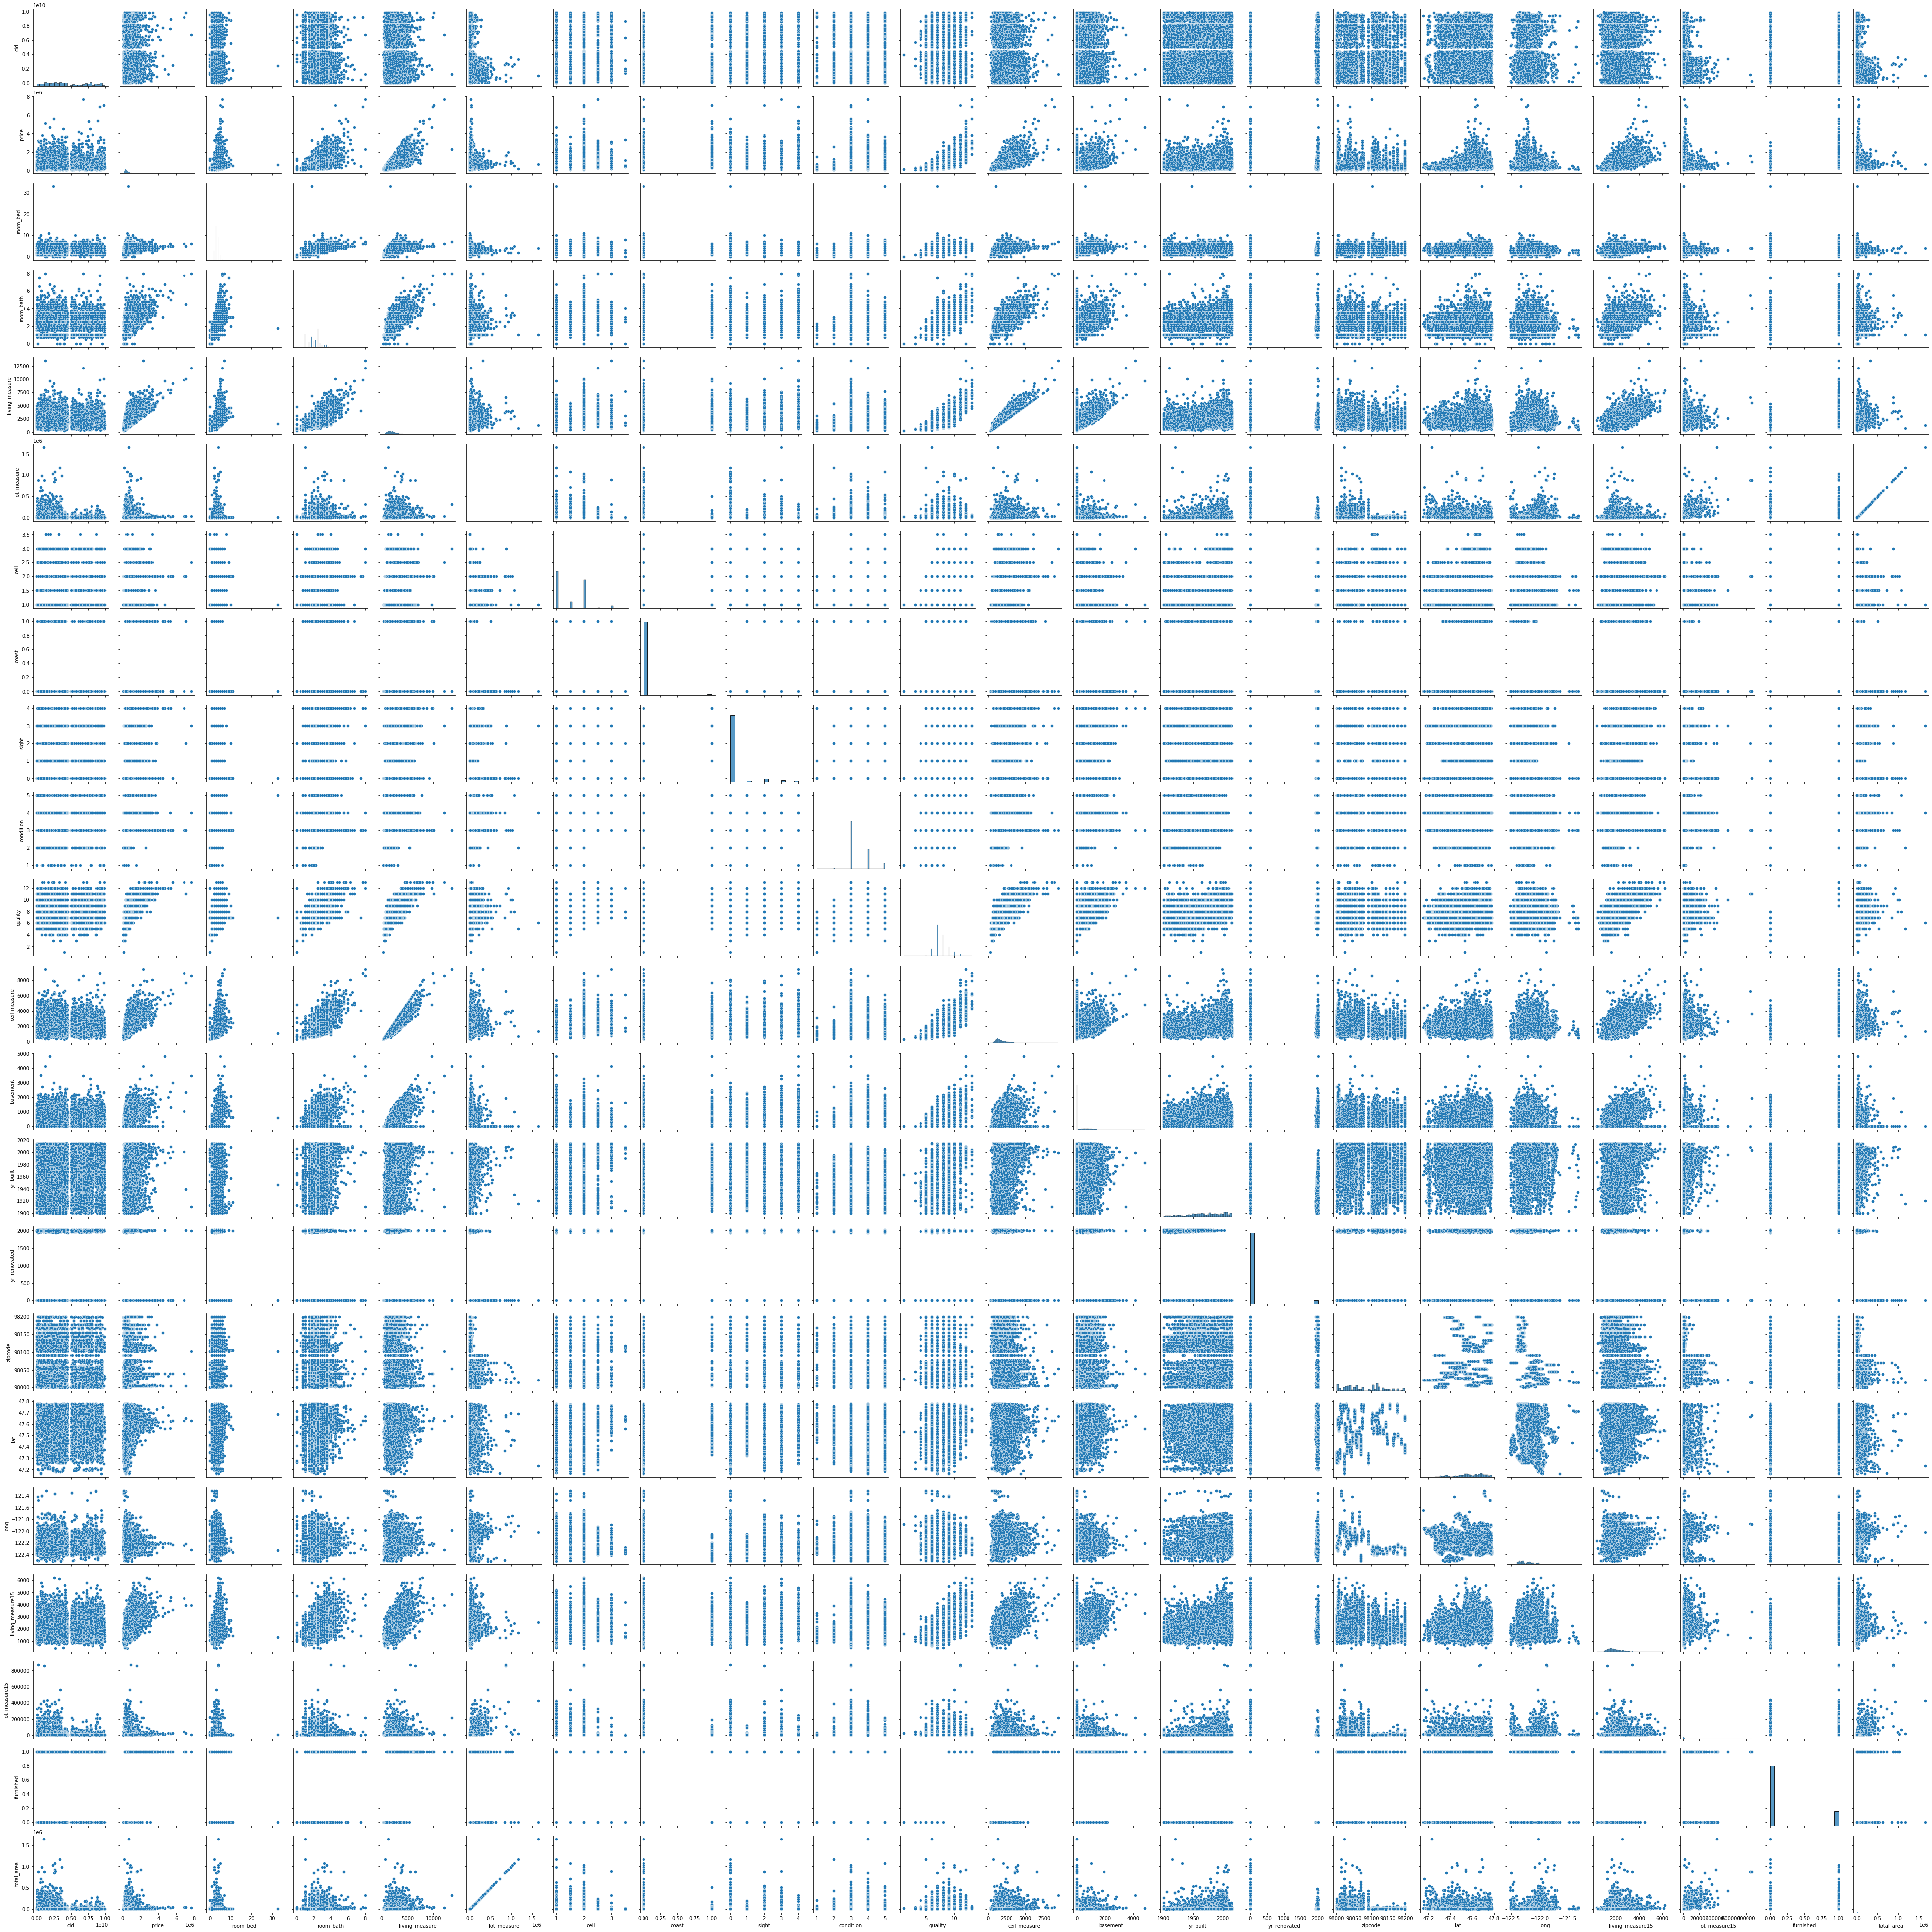

In [ ]:
sns.pairplot(data1)

In [16]:
#we will create new data frame that can be used for modeling
#We will convert the dayhours to 'month_year' as sale month-year is relevant for analysis

house_dfr=data1.copy()
data1.dayhours=data1.dayhours.str.replace('T000000', "")
data1.dayhours=pd.to_datetime(data1.dayhours,format='%Y%m%d')
data1['month_year']=data1['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
data1['month_year'].head()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-16-3c11ccd390f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['month_year']=data1['dayhours'].apply(lambda x: x.strftime('%B-%Y'))


0    November-2014
1    December-2014
2       April-2015
3         May-2014
4       April-2015
Name: month_year, dtype: object

In [18]:
data1['month_year'].value_counts()

April-2015        2210
July-2014         2204
June-2014         2165
August-2014       1923
October-2014      1866
March-2015        1854
May-2014          1761
September-2014    1761
December-2014     1454
November-2014     1396
February-2015     1235
January-2015       968
May-2015           639
Name: month_year, dtype: int64

In [19]:
data1.groupby(['month_year'])['price'].agg('mean')

month_year
April-2015        563229.323982
August-2014       537894.309412
December-2014     524978.649243
February-2015     508730.893927
January-2015      526621.446281
July-2014         545731.205989
June-2014         558937.630485
March-2015        543390.321467
May-2014          548957.154458
May-2015          559461.424100
November-2014     523412.287966
October-2014      540976.744909
September-2014    531460.377626
Name: price, dtype: float64

In [ ]:
## Drop the cid coloum in furthur analysis

In [21]:
data1.corr()

cid     price  room_bed  room_bath  living_measure  \
cid               1.000000 -0.018402  0.000831   0.004344       -0.013467   
price            -0.018402  1.000000  0.309011   0.524992        0.701639   
room_bed          0.000831  0.309011  1.000000   0.516772        0.577512   
room_bath         0.004344  0.524992  0.516772   1.000000        0.754422   
living_measure   -0.013467  0.701639  0.577512   0.754422        1.000000   
lot_measure      -0.132846  0.088672  0.031719   0.087143        0.171957   
ceil              0.018057  0.255428  0.175207   0.499863        0.352867   
coast            -0.002746  0.266927 -0.006685   0.063734        0.103902   
sight             0.010929  0.396766  0.079542   0.186684        0.283753   
condition        -0.024279  0.035114  0.027896  -0.127839       -0.060973   
quality           0.006416  0.666817  0.358396   0.664727        0.762402   
ceil_measure     -0.011836  0.604964  0.478441   0.684994        0.876683   
basement         -0.005795  0.323812  0.303035   0.283539        0.434419   
yr_built          0.020933  0.051796  0.153745   0.505092        0.316544   
yr_renovated     -0.017178  0.126803  0.018435   0.051101        0.055084   
zipcode          -0.007948 -0.051497 -0.153621  -0.202958       -0.198621   
lat              -0.002859  0.306334 -0.010228   0.023444        0.051118   
long              0.019466  0.019874  0.129836   0.221935        0.239214   
living_measure15 -0.004084  0.584222  0.393161   0.568194        0.756205   
lot_measure15    -0.139670  0.081807  0.029117   0.086627        0.182775   
furnished        -0.011086  0.565128  0.260252   0.484767        0.632625   
total_area       -0.132608  0.103778  0.044318   0.103419        0.193303   

                  lot_measure      ceil     coast     sight  condition  ...  \
cid                 -0.132846  0.018057 -0.002746  0.010929  -0.024279  ...   
price                0.088672  0.255428  0.266927  0.396766   0.035114  ...   
room_bed             0.031719  0.175207 -0.006685  0.079542   0.027896  ...   
room_bath            0.087143  0.499863  0.063734  0.186684  -0.127839  ...   
living_measure       0.171957  0.352867  0.103902  0.283753  -0.060973  ...   
lot_measure          1.000000 -0.005950  0.021571  0.075012  -0.009298  ...   
ceil                -0.005950  1.000000  0.023473  0.028211  -0.266543  ...   
coast                0.021571  0.023473  1.000000  0.403025   0.016607  ...   
sight                0.075012  0.028211  0.403025  1.000000   0.045051  ...   
condition           -0.009298 -0.266543  0.016607  0.045051   1.000000  ...   
quality              0.112541  0.457475  0.082841  0.249890  -0.148248  ...   
ceil_measure         0.182581  0.522648  0.072021  0.166930  -0.160782  ...   
basement             0.015107 -0.246066  0.080838  0.276482   0.174463  ...   
yr_built             0.052447  0.489062 -0.026537 -0.055153  -0.364947  ...   
yr_renovated         0.007636  0.005626  0.093025  0.103633  -0.061136  ...   
zipcode             -0.129411 -0.058108  0.030558  0.087096   0.004509  ...   
lat                 -0.085992  0.049279 -0.014395  0.005671  -0.015402  ...   
long                 0.229555  0.124285 -0.042188 -0.079720  -0.107780  ...   
living_measure15     0.143650  0.278854  0.086558  0.279077  -0.095002  ...   
lot_measure15        0.718097 -0.011917  0.030694  0.072867  -0.003731  ...   
furnished            0.118133  0.347073  0.069878  0.219435  -0.123725  ...   
total_area           0.999764  0.001851  0.023774  0.080963  -0.010604  ...   

                  basement  yr_built  yr_renovated   zipcode       lat  \
cid              -0.005795  0.020933     -0.017178 -0.007948 -0.002859   
price             0.323812  0.051796      0.126803 -0.051497  0.306334   
room_bed          0.303035  0.153745      0.018435 -0.153621 -0.010228   
room_bath         0.283539  0.505092      0.051101 -0.202958  0.023444   
living_measure    0.434419  0.316544      0.055084 -0.198621  0

In [ ]:
## Drop the cid coloum in furthur analysis as there is very less correlation
## drop one among area and lot_measure as they have high correlation